# ***PART 1***
# ***Ahmed Aboutaleb***
# ***900151538***

**Imports**

In [34]:
import random
import numpy as np
import glob 
import platform
import cv2 
import os 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import argparse
import imutils
import scipy.spatial
from collections import Counter
import matplotlib.pyplot as plt
import statistics

**Definitions**

In [35]:
def image_to_feature_vector(image, size=(32, 32)):
  image = np.array(image)
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
  return cv2.resize(image, size).flatten()

def load_images(img_dir):
  data_path = os.path.join("flower_photos",img_dir,'*g') 
  files = glob.glob(data_path)
  files.sort()
  data = [] 
  greyData = []
  data = np.array([cv2.imread(img, cv2.IMREAD_UNCHANGED) for img in files])
  data = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in data])
#  greyData = np.array([cv2.imread(img, cv2.IMREAD_UNCHANGED) for img in files])
  greyData = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in data])
#  for f1 in files:
#      image = cv2.imread(f1)
#      pixels = image_to_feature_vector(image)
#      data.append(pixels)
#      labels.append(img_dir)
  return data, greyData
  

**K Nearest Neighbour**

In [36]:
class KNearestNeighbor(object):
    #http://cs231n.github.io/classification/
    def __init__(self, k):
        self.k = k

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y

    def predict(self, X, l='L1'):
        """ X is N x D where each row is an example we wish to predict label for """

        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        # loop over all test rows
        for i in range(num_test):
            # find the nearest training example to the i'th test example
            if l == 'L1':
                # using the L1 distance (sum of absolute value differences)
                distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
            else:
                distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
            neighbors = []
            min_index = np.argpartition(distances,k) # get the index with smallest distance
            for z in range(k):
                neighbors.append(min_index[z])
           
            common= Counter(self.ytr[neighbors]).most_common(1)[0]
            Ypred[i] = common[0] # predict the label of the nearest example 
        return Ypred

**Import Data**

In [37]:
flower_types = ['tulips', 'sunflowers', 'roses', 'dandelion', 'daisy']

for img_dir in flower_types: # Enter Directory of all images  
  data, greyData = load_images(img_dir)
  vars()['feature_' + img_dir] = np.array(data)
  vars()['grey_feature_' + img_dir] = np.array(greyData)
#  vars()['label_' + img_dir] = np.array(img_dir)


In [38]:
x = ['tulips', 'sunflowers', 'roses', 'dandelion', 'daisy']
n = 100
x = np.array([i for i in x for _ in range(n)])

**Create 5-Fold and Testing Set**

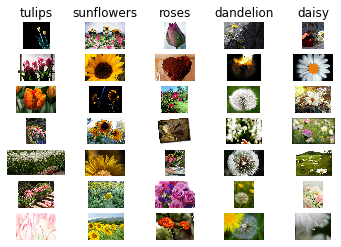

In [39]:
classes = ['tulips', 'sunflowers', 'roses', 'dandelion', 'daisy']

num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(x == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        if (cls == 'tulips'):
          plt.imshow(feature_tulips[idx].astype('uint8'))
        elif (cls == 'daisy'):
          plt.imshow(feature_daisy[idx].astype('uint8'))
        elif (cls == 'sunflowers'):
          plt.imshow(feature_sunflowers[idx].astype('uint8'))
        elif (cls == 'dandelion'):
          plt.imshow(feature_dandelion[idx].astype('uint8'))
        elif (cls == 'roses'):
          plt.imshow(feature_roses[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


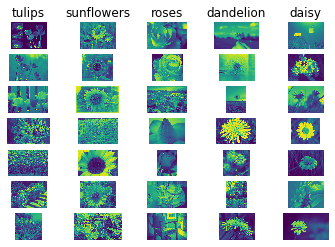

In [40]:
classes = ['tulips', 'sunflowers', 'roses', 'dandelion', 'daisy']

num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(x == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        if (cls == 'tulips'):
          plt.imshow(grey_feature_tulips[idx].astype('uint8'))
        elif (cls == 'daisy'):
          plt.imshow(grey_feature_daisy[idx].astype('uint8'))
        elif (cls == 'sunflowers'):
          plt.imshow(grey_feature_sunflowers[idx].astype('uint8'))
        elif (cls == 'dandelion'):
          plt.imshow(grey_feature_dandelion[idx].astype('uint8'))
        elif (cls == 'roses'):
          plt.imshow(grey_feature_roses[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [41]:
f_tulips = []
for i in range(0,feature_tulips.size):
  feature_tulips[i] = np.array(feature_tulips[i])
  f_tulips.append(cv2.resize(feature_tulips[i], (32, 32)).flatten())
f_tulips = np.array(f_tulips)

f_daisy = []
for i in range(0,feature_daisy.size):
  feature_daisy[i] = np.array(feature_daisy[i])
  f_daisy.append(cv2.resize(feature_daisy[i], (32, 32)).flatten())
f_daisy = np.array(f_daisy)

f_dandelion = []
for i in range(0,feature_dandelion.size):
  feature_dandelion[i] = np.array(feature_dandelion[i])
  f_dandelion.append(cv2.resize(feature_dandelion[i], (32, 32)).flatten())
f_dandelion = np.array(f_dandelion)

f_sunflowers = []
for i in range(0,feature_sunflowers.size):
  feature_sunflowers[i] = np.array(feature_sunflowers[i])
  f_sunflowers.append(cv2.resize(feature_sunflowers[i], (32, 32)).flatten())
f_sunflowers = np.array(f_sunflowers)

f_roses = []
for i in range(0,feature_roses.size):
  feature_roses[i] = np.array(feature_roses[i])
  f_roses.append(cv2.resize(feature_roses[i], (32, 32)).flatten())
f_roses = np.array(f_roses)

In [42]:
fold = []
for i in range(5):
  fold.append(np.concatenate((f_tulips[i*100:i*100+100] , f_sunflowers[i*100:i*100+100], f_roses[i*100:i*100+100],f_dandelion[i*100:i*100+100], f_daisy[i*100:i*100+100])))
test_set = np.concatenate((f_tulips[500:600] , f_sunflowers[500:600], f_roses[500:600],f_dandelion[500:600], f_daisy[500:600]))
fold = np.array(fold)
x = [0, 1, 2, 3, 4]
n = 100
x = np.array([i for i in x for _ in range(n)])

In [43]:
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 75, 100, 150, 200, 300, 500]
accuracies = {}
for k in k_choices:
  accuracies[k] = []
  for j in range(0,5):
    if j!=0:
      train_1 = np.concatenate((fold[:j]), axis=0)
    if j!=4:
      train_2 = np.concatenate((fold[j+1:]), axis=0)
    if j==0:
      train = train_2
    elif j==4:
      train = train_1
    else:
      train = np.concatenate((train_1,train_2), axis=0)
    train_labels = np.concatenate((x, x, x, x), axis=0)
    classifier = KNearestNeighbor(i)
    classifier.train(train, train_labels)

    # Predict the labels of testing data
    y_test_pred = classifier.predict(fold[j], 'L2')
    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == x)
    accuracy = float(num_correct) / 500
    accuracies[k].append(accuracy)

**2. Plot of cross-validation accuracy (Y axis) versus number of
neighborhood 'k' (X axis) showing the best chosen 'k'. [1.5%]**

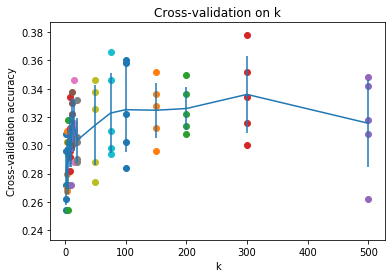

In [44]:
for k in k_choices:
    accuraciess = accuracies[k]
    plt.scatter([k] * len(accuraciess), accuraciess)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

K = 300 seems like the peak number of Ks to compare to

 **3. Using the 500 images testing set, report your Correct Classification
Rate of each of the 5 classes separately. CCRn is the ratio of the
number of correctly classified images in class n divided by the total
number of test images in class n. [0.5%]**

In [45]:
train = np.concatenate((fold[:]), axis=0)
train_labels = np.concatenate((x, x, x, x, x), axis=0)
classifier = KNearestNeighbor(300)
classifier.train(train, train_labels)
# Predict the labels of testing data
for i in range(0, 5):
  y_test_pred = classifier.predict(test_set[i*100:(i+1)*100], 'L2')
  # Compute and print the fraction of correctly predicted examples
  num_correct = np.sum(y_test_pred == x[i*100:(i+1)*100])
  accuracy = float(num_correct) / 100
  print(accuracy)

0.08
0.64
0.21
0.17
0.35


CCR of Tulips = 8%;
CCR of Sunflower = 64%;
CCR of Roses = 21%;
CCR of Dandelion = 17%;
CCR of Daisies = 35%;

**4. Using the 500 testing set, report your Average Correct Classification
Rate (ACCR). ACCR is the number of correctly classified images divided
by the total number of testing images (which is 500). [0.5%]**

In [46]:
train = np.concatenate((fold[:]), axis=0)
train_labels = np.concatenate((x, x, x, x, x), axis=0)
classifier = KNearestNeighbor(300)
classifier.train(train, train_labels)
# Predict the labels of testing data
y_test_pred = classifier.predict(test_set, 'L2')
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == x)
accuracy = float(num_correct) / 500
print(accuracy)

0.29


ACCR = 29%

**5. Using the 500 testing set, report your Average Correct Classification
Rate (ACCR) for the grayscale images and compare it to the color
images ACCR. [0.5%]**

In [47]:
grey_f_tulips = []
for i in range(0,grey_feature_tulips.size):
  grey_feature_tulips[i] = np.array(grey_feature_tulips[i])
  grey_f_tulips.append(cv2.resize(grey_feature_tulips[i], (32, 32)).flatten())
grey_f_tulips = np.array(grey_f_tulips)

grey_f_daisy = []
for i in range(0,grey_feature_daisy.size):
  grey_feature_daisy[i] = np.array(grey_feature_daisy[i])
  grey_f_daisy.append(cv2.resize(grey_feature_daisy[i], (32, 32)).flatten())
grey_f_daisy = np.array(grey_f_daisy)

grey_f_dandelion = []
for i in range(0,grey_feature_dandelion.size):
  grey_feature_dandelion[i] = np.array(grey_feature_dandelion[i])
  grey_f_dandelion.append(cv2.resize(grey_feature_dandelion[i], (32, 32)).flatten())
grey_f_dandelion = np.array(grey_f_dandelion)

grey_f_sunflowers = []
for i in range(0,grey_feature_sunflowers.size):
  grey_feature_sunflowers[i] = np.array(grey_feature_sunflowers[i])
  grey_f_sunflowers.append(cv2.resize(grey_feature_sunflowers[i], (32, 32)).flatten())
grey_f_sunflowers = np.array(grey_f_sunflowers)

grey_f_roses = []
for i in range(0,grey_feature_roses.size):
  grey_feature_roses[i] = np.array(grey_feature_roses[i])
  grey_f_roses.append(cv2.resize(grey_feature_roses[i], (32, 32)).flatten())
grey_f_roses = np.array(grey_f_roses)

In [48]:
grey_train_set = np.concatenate((grey_f_tulips[0:500] , grey_f_sunflowers[0:500], grey_f_roses[0:500],grey_f_dandelion[0:500], grey_f_daisy[0:500]))
grey_test_set = np.concatenate((grey_f_tulips[500:600] , grey_f_sunflowers[500:600], grey_f_roses[500:600],grey_f_dandelion[500:600], grey_f_daisy[500:600]))

In [49]:
train_labels = [0, 1, 2, 3, 4]
n = 500
train_labels = np.array([i for i in train_labels for _ in range(n)])
classifier = KNearestNeighbor(300)
classifier.train(grey_train_set, train_labels)
# Predict the labels of testing data
y_test_pred = classifier.predict(grey_test_set, 'L2')
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == x)
accuracy = float(num_correct) / 500
print(accuracy)

0.246
